# Experiment-1

## Aim: Read Data from a sample data file, print the shape of data , name of features and the first 10 rows or instances on the given sample data file

In [2]:
import matplotlib as plt
import numpy as nump
import pandas as pd

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.model_selection import ShuffleSplit, train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,label_binarize,StandardScaler,MinMaxScaler

In [4]:
file="german.data"

In [5]:
names=['excheck','duration','credit-history','purpose','credit-amount','savings','employmentsc','installmentrate','statussex','other-debts','residance-since','property','age','otherinstallmentplan','housing','existing-credits','job','label-pre','telephone','foreign-worker','classification']

In [6]:
data=pd.read_csv(file, names=names,delimiter=' ')

In [7]:
data.head(10)

,excheck,duration,credit-history,purpose,credit-amount,savings,employmentsc,installmentrate,statussex,other-debts,...,property,age,otherinstallmentplan,housing,existing-credits,job,label-pre,telephone,foreign-worker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


In [8]:
data.tail(10)

,excheck,duration,credit-history,purpose,credit-amount,savings,employmentsc,installmentrate,statussex,other-debts,...,property,age,otherinstallmentplan,housing,existing-credits,job,label-pre,telephone,foreign-worker,classification
990,A14,12,A34,A46,3565,A65,A72,2,A93,A101,...,A122,37,A143,A152,2,A172,2,A191,A201,1
991,A14,15,A31,A43,1569,A62,A75,4,A93,A101,...,A123,34,A141,A152,1,A172,2,A191,A201,1
992,A11,18,A32,A43,1936,A65,A74,2,A94,A101,...,A123,23,A143,A151,2,A172,1,A191,A201,1
993,A11,36,A32,A42,3959,A61,A71,4,A93,A101,...,A122,30,A143,A152,1,A174,1,A192,A201,1
994,A14,12,A32,A40,2390,A65,A75,4,A93,A101,...,A123,50,A143,A152,1,A173,1,A192,A201,1
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2
999,A12,45,A34,A41,4576,A62,A71,3,A93,A101,...,A123,27,A143,A152,1,A173,1,A191,A201,1


In [9]:
data.classification.replace([1,2],[0,1], inplace=True)

In [10]:
data.classification.value_counts()

0    700
1    300
Name: classification, dtype: int64

In [11]:
print(data.columns)

Index(['excheck', 'duration', 'credit-history', 'purpose', 'credit-amount',
       'savings', 'employmentsc', 'installmentrate', 'statussex',
       'other-debts', 'residance-since', 'property', 'age',
       'otherinstallmentplan', 'housing', 'existing-credits', 'job',
       'label-pre', 'telephone', 'foreign-worker', 'classification'],
      dtype='object')


In [12]:
from matplotlib import pyplot as plt

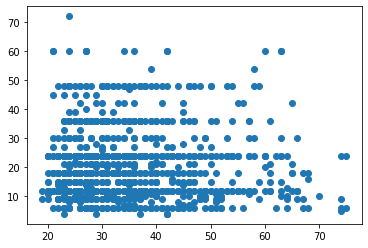

In [13]:
plt.scatter(data.age, data.duration)
plt.show()

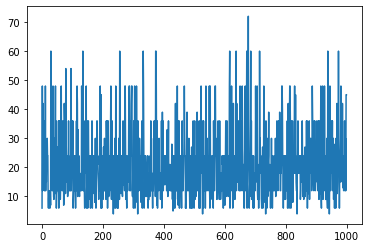

In [14]:
plt.plot(data.duration)

## Submitted By : Shubh Sinha(1801227669)
### Branch: CS& IT

In [15]:
data = pd.read_csv(file,names = names, delimiter=' ')

In [16]:
data.classification.replace([1,2], [0,1], inplace=True)

In [17]:
data.classification.value_counts()

0    700
1    300
Name: classification, dtype: int64

In [18]:
numvars = ['credit-amount','duration','installmentrate','residance-since','age','existing-credits','label-pre','classification']

In [22]:
numvars1 = ['credit-amount','duration','installmentrate','residance-since','age','existing-credits','label-pre']

In [23]:
numdata_std = pd.DataFrame(StandardScaler().fit_transform(data[numvars].drop(['classification'], axis=1)))

In [24]:
numdata_std.columns = numvars1

In [25]:
numdata_std.head()

,credit-amount,duration,installmentrate,residance-since,age,existing-credits,label-pre
0,-0.745131,-1.236478,0.918477,1.046987,2.766456,1.027079,-0.428290
1,0.949817,2.248194,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290
2,-0.416562,-0.738668,-0.870183,0.140505,1.183312,-0.704926,2.334869
3,1.634247,1.750384,-0.870183,1.046987,0.831502,-0.704926,2.334869
4,0.566664,0.256953,0.024147,1.046987,1.535122,1.027079,2.334869


In [26]:
from collections import defaultdict

In [27]:
catvars = ['excheck', 'credit-history', 'purpose', 'savings', 'employmentsc', 'statussex', 'other-debts', 'property', 'otherinstallmentplan', 'housing', 'telephone', 'foreign-worker']

In [28]:
d = defaultdict(LabelEncoder)

In [29]:
locatedata = data[catvars].apply(lambda x: d[x.name].fit_transform(x))

In [30]:
for x in range(len(catvars)):
    print(catvars[x],":",data[catvars[x]].unique())
    print(catvars[x],":",locatedata[catvars[x]].unique())

excheck : ['A11' 'A12' 'A14' 'A13']
excheck : [0 1 3 2]
credit-history : ['A34' 'A32' 'A33' 'A30' 'A31']
credit-history : [4 2 3 0 1]
purpose : ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
purpose : [4 7 3 0 1 9 5 6 2 8]
savings : ['A65' 'A61' 'A63' 'A64' 'A62']
savings : [4 0 2 3 1]
employmentsc : ['A75' 'A73' 'A74' 'A71' 'A72']
employmentsc : [4 2 3 0 1]
statussex : ['A93' 'A92' 'A91' 'A94']
statussex : [2 1 0 3]
other-debts : ['A101' 'A103' 'A102']
other-debts : [0 2 1]
property : ['A121' 'A122' 'A124' 'A123']
property : [0 1 3 2]
otherinstallmentplan : ['A143' 'A141' 'A142']
otherinstallmentplan : [2 0 1]
housing : ['A152' 'A153' 'A151']
housing : [1 2 0]
telephone : ['A192' 'A191']
telephone : [1 0]
foreign-worker : ['A201' 'A202']
foreign-worker : [0 1]


In [31]:
dummyvars = pd.get_dummies(data[catvars])

In [32]:
data_clean = pd.concat([numdata_std[numvars1], dummyvars], axis=1)

In [33]:
data_clean = pd.concat([data_clean, data['classification']], axis=1)

In [34]:
print(data_clean.shape)

(1000, 58)


In [35]:
data_clean.head()

,credit-amount,duration,installmentrate,residance-since,age,existing-credits,label-pre,excheck_A11,excheck_A12,excheck_A13,...,otherinstallmentplan_A142,otherinstallmentplan_A143,housing_A151,housing_A152,housing_A153,telephone_A191,telephone_A192,foreign-worker_A201,foreign-worker_A202,classification
0,-0.745131,-1.236478,0.918477,1.046987,2.766456,1.027079,-0.428290,1,0,0,...,0,1,0,1,0,0,1,1,0,0
1,0.949817,2.248194,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,0,1,0,...,0,1,0,1,0,1,0,1,0,1
2,-0.416562,-0.738668,-0.870183,0.140505,1.183312,-0.704926,2.334869,0,0,0,...,0,1,0,1,0,1,0,1,0,0
3,1.634247,1.750384,-0.870183,1.046987,0.831502,-0.704926,2.334869,1,0,0,...,0,1,0,0,1,1,0,1,0,0
4,0.566664,0.256953,0.024147,1.046987,1.535122,1.027079,2.334869,1,0,0,...,0,1,0,0,1,1,0,1,0,1
